In [1]:
import sys, os, glob, time
import numpy as N
import subprocess as sp
import pylab as pl

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
rc('font',**{'family':'serif'})
time_init_start = time.time()

# ==============================================
# Read.& proc. toolkit for data sets' structure.
# ==============================================
from read_usertools import UserTools

# ==============================================
# Read.& proc. data sets' visualisation tools.
# ==============================================
from read_plotdoc import Plotter

# ==============================================
# Reading toolkit for data sets' structure.
# ==============================================
from read_misctools import MiscTools

# ==============================================
# File interpreters for read.py's interface.
# ==============================================
from read_sifters import Sifters

# ==============================================
# Reading procedure for data sets' structure.
# ==============================================
from read_procedures import readProcedures

# ==============================================
# Argument interpreter for read.py's interface.
# ==============================================
from read_args import readArgs

# ==============================================
# Indra data sets' reading MO.
# ==============================================
from read import readDo

time_init_end = time.time()

print "Initialization time: {0:.2f} seconds".format((time_init_end - time_init_start))

Initialization time: 0.09 seconds


In [2]:
def read_ini( what="pos", indraN=0, iA=0, iB=0, subfolder=None, fftfile=None, 
              tmpfolder=False, sfset=False, sortIDs=False, lessprint=True,
              multiset=False,
              box_params=False,
              outputpath=False,
              w2f=False,
              plotdata=False,
              plotdim=2,
              origamipath=False
            ):

    data_params = \
        { # Data structure parameters:
               "what" :( list(what)  ),
             "indraN" :( indraN      ),
                 "iA" :( iA          ),
                 "iB" :( iB          ),
          "subfolder" :( subfolder   ),
            "fftfile" :( fftfile     ),
            # Reading options:
          "tmpfolder" :( tmpfolder   ),
              "sfset" :( sfset       ),
            "sortIDs" :( sortIDs     ),
          "lessprint" :( lessprint   ),
           "multiset" :( multiset    ),
            # Extracts data from a coordinate box at positions specified:
         "box_params" :( box_params  ),
            # Desired output filepath, 
            # or False (program storing to user's own folder).
         "outputpath" :( outputpath  ),
            # Write 2 file: Probably a bad idea ...
                "w2f" :( w2f         ),
           "plotdata" :( plotdata    ),
            # Apply floats as "([min,max], [min,max], [min,max])" in Mpc/h units,
            # respectively for directions x, y, z. # Turned off w/: None/False
            "plotdim" :( plotdim     ), # Dimensions projected in plot
            # Origami functionality
        "origamipath" :( origamipath )
        }

    tmp = sp.call('clear',shell=True)

    ini = readDo()                # Initialize!
    ini.read_params = data_params # Set params
    " 1. "
    ini.callArgsChecker()         # Verify values
    " 2. "
    return ini.beginReading(), ini     # Do the thing

# Calling function

In [3]:
# Read halo IDs
outputvars, fofinstance = read_ini(
                what       = ["fof"],
                indraN     = 2,
                iA         = 0,
                iB         = 0,
                subfolder  = 63,
                tmpfolder  = True,
#                 multiset   = "store"
)

Ngroups, Nids, TotNgroups, GroupLen, GroupOffset, fofIDs = outputvars


 Total parameters loaded: 16
 Parameters initialized with values:
        what : ['fof']
      indraN :      2
          iA :      0
          iB :      0
   subfolder :     63
   tmpfolder :   True
       sfset :  False
     sortIDs :  False
   lessprint :   True
    multiset :  False
  box_params :  False
  outputpath :  False
         w2f :  False
    plotdata :  False
     plotdim :      2
 origamipath :  False

            All necessary parameters have been set. Continuing...
            

    --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 
        Currently reading:
        Data type   :    fof   (/out of sets:   'fof'    )
        indraN      :      2             ( /:    [2]     )
        iA          :      0             ( /:    [0]     )
        iB          :      0             ( /:    [0]     )
        subfolder   :     63             ( /:    [63]    )
        
 Browsing FOF-files (tabs):
        ---------------------------------------------------------------

In [4]:
#%tb

In [5]:
" Extracting halo IDs "
haloIDs = fofIDs[GroupOffset[3]:GroupOffset[3]+GroupLen[3]]

In [6]:
" Extract positions "
from read import read_ini
IDs, pos, scalef, rs = read_ini(
    what       = ["pos"],
    indraN     = 2,
    iA         = 0,
    iB         = 0,
    subfolder  = 63,
    tmpfolder  = True,
    sortIDs    = True
)


 Total parameters loaded: 16
 Parameters initialized with values:
        what : ['pos']
      indraN :      2
          iA :      0
          iB :      0
   subfolder :     63
   tmpfolder :   True
       sfset :  False
     sortIDs :   True
   lessprint :   True
    multiset :  False
  box_params :  False
  outputpath :  False
         w2f :  False
    plotdata :  False
     plotdim :      2
 origamipath :  False

            All necessary parameters have been set. Continuing...
            

    --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 
        Currently reading:
        Data type   :    pos   (/out of sets:   'pos'    )
        indraN      :      2             ( /:    [2]     )
        iA          :      0             ( /:    [0]     )
        iB          :      0             ( /:    [0]     )
        subfolder   :     63             ( /:    [63]    )
        
  * Accessing file:	indra2tmp/snap63/file.0   (pos) ...
  * Accessing file:	indra2tmp/snap63/file.5

In [25]:
pos_hp = pos[haloIDs] # Halo particles singled out

In [21]:
import pylab as pl
# " Plotting sandbox below "

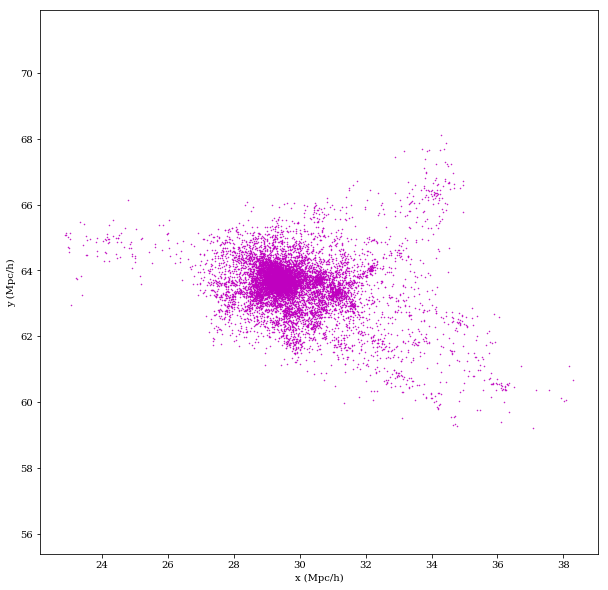

In [26]:
pl.figure(figsize=(10,10))
pl.scatter( pos_hp[:,0], pos_hp[:,1], s=1, c='m', marker='.' )
pl.xlabel('x (Mpc/h)')
pl.ylabel('y (Mpc/h)')
pl.axis('equal')
pl.show()

In [30]:
# " Isolation of all matter to the vicinity of the halo: cut-out border around halo particles "

xmin_cutout = N.min(pos[haloIDs,0])
xmax_cutout = N.max(pos[haloIDs,0])

ymin_cutout = N.min(pos[haloIDs,1])
ymax_cutout = N.max(pos[haloIDs,1])

zmin_cutout = N.min(pos[haloIDs,2])
zmax_cutout = N.max(pos[haloIDs,2])

posargs_cutout = N.where( 
    (pos[:,0] < xmax_cutout ) & (pos[:,1] < ymax_cutout ) & (pos[:,2] < zmax_cutout ) &\
    (pos[:,0] > xmin_cutout ) & (pos[:,1] > ymin_cutout ) & (pos[:,2] > zmin_cutout ) 
)[0]

pos_cutout = pos[posargs_cutout]

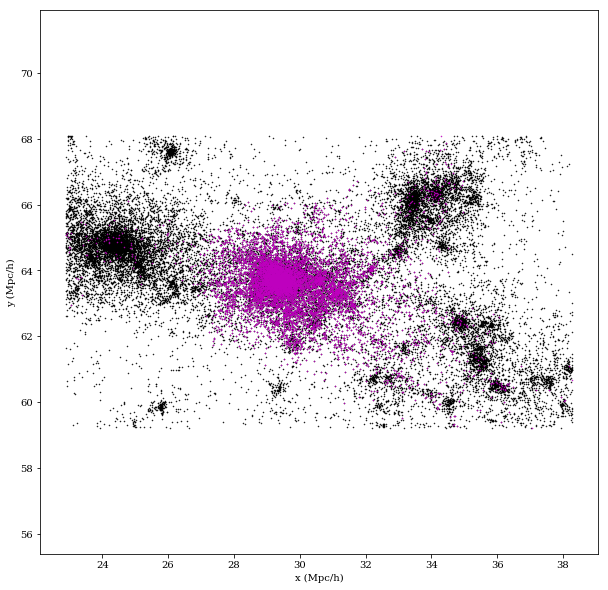

In [32]:
# " See the vicinty as well as the halo "
pl.figure(figsize=(10,10))
# pl.scatter( pos_cutout[:,0], pos_cutout[:,1], s=1, c='k' )
# pl.scatter( pos_hp[:,0],     pos_hp[:,1],     s=1, c='m' )
pl.scatter( pos_cutout[:,0], pos_cutout[:,1], s=1, c='k', marker='.' )
pl.scatter( pos_hp[:,0],     pos_hp[:,1],     s=1, c='m', marker='.' )
pl.xlabel('x (Mpc/h)')
pl.ylabel('y (Mpc/h)')
pl.axis('equal')
pl.show()

In [37]:
oritags = read_ini(
    what        = ["origami"],
    indraN      = 2,
    iA          = 0,
    iB          = 0,
    subfolder   = 63,
    tmpfolder   = True,
    origamipath = "/home/idies/workspace/indra/origami/i200tmp/i200tmp_sf63_tag.dat"
)[0]


 Total parameters loaded: 16
 Parameters initialized with values:
        what : ['origami']
      indraN :      2
          iA :      0
          iB :      0
   subfolder :     63
   tmpfolder :   True
       sfset :  False
     sortIDs :  False
   lessprint :   True
    multiset :  False
  box_params :  False
  outputpath :  False
         w2f :  False
    plotdata :  False
     plotdim :      2
 origamipath : /home/idies/workspace/indra/origami/i200tmp/i200tmp_sf63_tag.dat

            All necessary parameters have been set. Continuing...
            

    --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 
        Currently reading:
        Data type   : origami   (/out of sets: 'origami'  )
        indraN      :      2             ( /:    [2]     )
        iA          :      0             ( /:    [0]     )
        iB          :      0             ( /:    [0]     )
        subfolder   :     63             ( /:    [63]    )
        


SystemExit: 
        Could not find origami file at specified path: /home/idies//home/idies/workspace/indra/origami/i200tmp/i200tmp_sf63_tag.dat
        

/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
